# Project: Investigation of a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analyzing a Dataset with 10,866 movies collected from The Movie Database (TMDb), including variables such as production companies, user ratings, genres, release year, and film budgets and revenues in terms of 2010 dollars. For that, I will use Numpy, Pandas, MatPlotLib and Seaborn on a Jupyter Notebook.

> My goal is to conclude about examples of success factors we can identify from this Dataset, and to lead recommendations about how to identify general success factors better in the future from the Database.

> Throughout this observation, I will try to establish correlations between categorical and numerical data, describing relationships between the user ratings (votes) and financial performance (association between budget and revenue), that would explain an eventual causation of successful engagement (ranking ratings and financial performance) from factors such as production companies and genres, and with special attention on how this would be explained over time (if release year affects validity or consistency of predictors). 


In [106]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv ('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### General Properties

> A quick overview on the Dataset shows me a lot of specific information that I will not need, as I am choosing to analyze variables that will allow me to establish rankings related with user ratings and financial performance over time. So my first task is to minimize half of the columns I will look at.

In [108]:
df.drop (['id', 'imdb_id','popularity','original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'release_date'], axis=1, inplace=True)

<a id='wrangling'></a>
## Data Wrangling

> In order to start loading the data for the analysis, I need to identify what is the complete "Time Frame" of my DataSet, because at the end of my analysis I want to be able to rank accurately the best ratings and best financial performances. So I want to make sure they don't change so much over time, or at least to understand how. Meanwhile, I must check for cleanliness in all these columns, and then trim the findings in rankings.

In [109]:
df.describe()

,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,3.091321e+07,1.170035e+08,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Numerical Data

> The Describe function allows me to determine the Time Frame of the Dataset, that is from 1960 to 2015. It also shows me that the vote count goes from 10 to 9,767, averaging from 1.5 to 9.2, with a mean of 5.9.
Unfortunately, the Budget and Revenue general calculations present some odd numbers from whose I can't conclude much yet. Also, results such as Standard deviation don't inform me much, except that the number of movies on the Database increases over time the same as the user votes. Which simply shows that the Database inputs increased over time.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 764.1+ KB


#### Data Cleaning

> The investigation could take the evolution of user engagement and inflation in consideration. For example, histograms can show me that most data input is located from a certain year. Average votes might also increase over time, which would show the latest movies with a better performance than the oldest. Same way, budgets, and revenue should increase over time, as the movie industry has increased its economic product over the decades. This would demand me to find a way to standardize these units, so I can compare them over time and in economic dimension of the overall industry. 

> But for now, I want to see why some data is missing in some columns. So, I will run a histogram of the columns that have missing values.

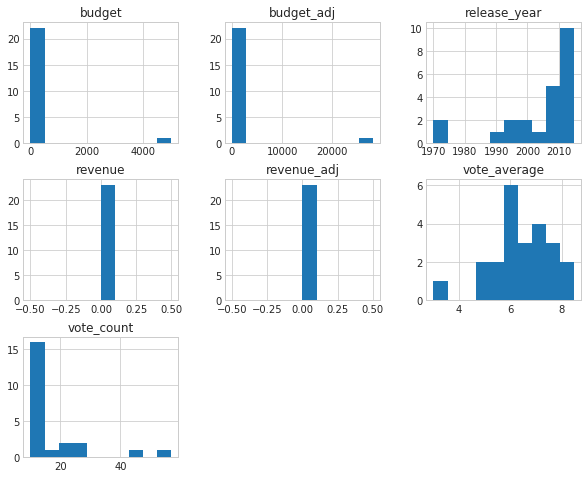

In [111]:
df[df.genres.isnull()].hist(figsize=(10,8));

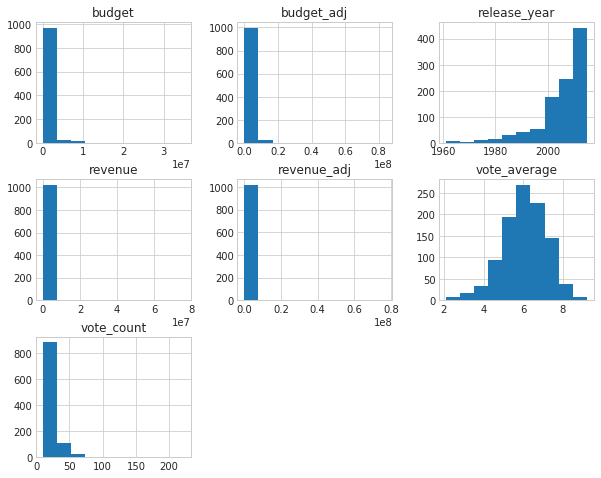

In [112]:
df[df.production_companies.isnull()].hist(figsize=(10,8));

#### Categorical Data

> So far, the Info function showed me I will be dealing with Integers, Objects, and Floats, which might challenge me. But it also showed me that data on Genres and Production Companies is incomplete when compared to the others. By running a histogram of these two factors, I discovered that the information is mainly missing on genres that were produced with budget or revenue close to zero, despite the ratings or release year being completed. That means that the input is missing mainly because these movies didn't have a good financial performance. Fortunately, I intend to ignore movies with a poor financial performance in my ranking. So, I will simply drop them.

> Same way, By comparing on the histograms the Budget and Revenue columns with the Budget_Adj and Revenue_Adj ones, I discover that there is not much impact on complementary information I could get from updating the inflation on my analysis, as I initially thought. The shape of the bins is very similar, which shows that the proportional value remains the same. So, I decided to drop this information from my analysis too.

In [113]:
df.drop (['budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [114]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 7 columns):
budget                  9827 non-null int64
revenue                 9827 non-null int64
genres                  9827 non-null object
production_companies    9827 non-null object
vote_count              9827 non-null int64
vote_average            9827 non-null float64
release_year            9827 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 614.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> The relationships between the variables I'm trying to establish are sometimes absolute, sometimes relative, which demands me to correlate the variables with special care. The Data cleaning allowed me to filter from 10865 entries to 9827, but now I must start reasoning in the matter of rankings.

> For now, I still want to have an overview of all variables over time. Which demands me to order each column in relation to time. As my focus on relating all independent variables with the dependent variables revenue and votes, I still have the challenge of reducing the number of entries by their frequency, or by their maximum rate.

> Even if frequency would be the most tempting path, I couldn't trust the results in my reasoning "over time" (because the data input evolved over time). So, if I simply sort the counts and try to see the relations between the maximum rates for each variable, I believe I can get better trustful answers.

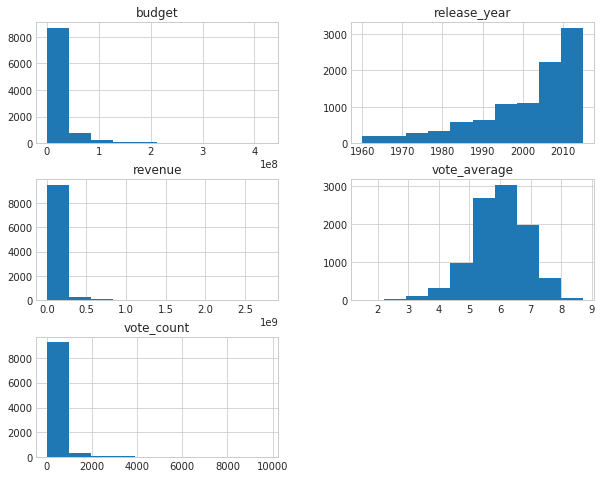

In [115]:
df.hist(figsize=(10,8));

In [116]:
df.sort_values(by=['revenue', 'vote_average', 'release_year'], ascending=False, na_position='first')

,budget,revenue,genres,production_companies,vote_count,vote_average,release_year
1386,237000000,2781505847,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009
3,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
5231,200000000,1845034188,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997
4361,220000000,1519557910,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012
0,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
4,190000000,1506249360,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
14,280000000,1405035767,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015
3374,125000000,1327817822,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011
5422,150000000,1274219009,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013
5425,200000000,1215439994,Action|Adventure|Science Fiction,Marvel Studios,6882,6.9,2013


### What are the best financial performances associated with the best ratings?

> The general histogram seemed to point a relationship between revenue and vote count and vote average, two variables that indicate user engagement in ratings. The vote count was kept for purposes of verification. As I am more interested in the categorization of rankings, the vote average tells me more qualitative answers about how the movies were perceived. I just want to be sure that the best ratings are not only qualitative but also quantitive. That verification will help my conclusions.

> The histogram also confirmed that the number of movies and votes increased over time. But sorting these variables by order of revenue and rating does not point to a growing engagement per year, as I initially thought that it could. Even if the biggest revenues and budgets are associated with most recent movies, we can see some are 10 to almost 20 years old among the top ten. What makes me feel more confident I didn't spend code uselessly.

> It seems to be a correlation between budget and successful performance of the top 10 revenues. Even if profit is beyond my inquiry, I can clearly see the proportion of budget and revenue is in the order of figures, therefore exponential. So I feel satisfied that I can see a successful financial performance from the sorting.

> The ratings are definitely more towards the maximum average than to the mean. For my surprise, I see a movie released in 1997 with a high count of votes. Which breaks my initial assumption that the user engagement would be higher in most recent movies. It looks like the most the movie was successful, the most the users would have voted, and with better ratings.

> If I have taken the path of coding by frequency, I would have lost the bottom of the sorting, that here showed me that movies with poor scores of vote average, also have bad vote counts. So, the evolution of engagement over time is not as evident as I thought.

> The two plots below show that the correlations between Revenue and Budget, Vote count and Vote Average tent to be positive, even if moderate to weak.

Text(0,0.5,'Revenue')

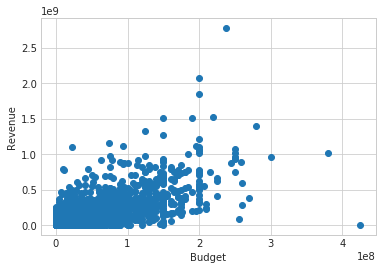

In [121]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')

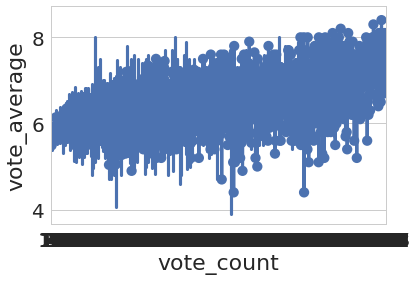

In [170]:
sns.set_style("whitegrid")
ax = sns.pointplot(x='vote_count', y='vote_average', data=df)

### Which production companies are associated with the financial performances and best ratings?

> It seems that very few production companies were responsible for fundraising biggest budgets. Among the top 10, for example, we can see Marvel Studios repeatedly appearing and further on the list is Walt Disney. 

> An interesting fact I learn from this observation is these production companies are associated with others, that don't appear consistently among the biggest revenues. Which might indicate that the role of these top production companies in the production might be more associated with executive finances than perhaps creation. Unfortunately, the database does not provide me with more details to investigate that. 

> So, by comparing the fact that the Database allows the input of variables such as "director" or "cast" but does not specify the role of each production company, I could conclude that the credits input seem incomplete for the kind of investigation I am doing. Which is an inquiry that production companies could have had. What makes me ask if the Database is projected to support the industry as much as the audience.

> The graph below shows the most active producers, and we can confirm they appear on the list above as among the most successful. So, the better a production company performs, the most chances of their movies to receive good ratings.

Columbia Pictures Corporation             160
Touchstone Pictures                       178
Walt Disney Pictures                      213
Metro-Goldwyn-Mayer (MGM)                 218
New Line Cinema                           219
Columbia Pictures                         272
Twentieth Century Fox Film Corporation    282
Paramount Pictures                        431
Warner Bros.                              509
Universal Pictures                        522
dtype: int64


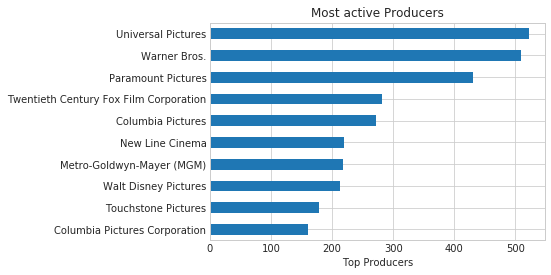

In [144]:
production_companies = df["production_companies"].str.cat(sep="|").split("|")

table=pd.Series(production_companies).value_counts(ascending=True)[-10:]
graph = table.plot.barh()
graph.set(title = "Most active Producers",xlabel = "Top Producers")
print(table)

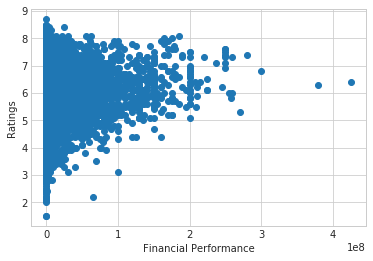

In [157]:
%matplotlib inline
plt.xlabel('Financial Performance')
plt.ylabel('Ratings')
plt.scatter(df['budget'], df['vote_average'])
plt.show()

Family             1107
Science Fiction    1142
Crime              1300
Adventure          1390
Horror             1526
Romance            1572
Action             2240
Thriller           2749
Comedy             3442
Drama              4373
dtype: int64


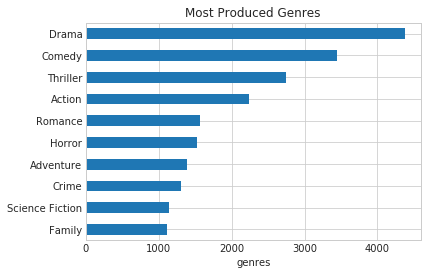

In [142]:
genres = df["genres"].str.cat(sep="|").split("|")

table=pd.Series(genres).value_counts(ascending=True)[-10:]
graph = table.plot.barh()
graph.set(title = "Most Produced Genres",xlabel = "genres")
print(table)

### Which film genres seem to have performed better over the last years financially and in ratings?

> The film genres seem definite to be an important success factor in financial performance and user ratings. But the fact that this variable is updated on the database without standards, would make it time-consuming to organize. For example, two productions from Marvel Studios with the same genres, are written in different orders. As I am overviewing a ranking of top ones, on the other hand, I can already see through the sorting I did that for example, that the most successful movies are unanimously genres of fictions and not documentaries. Also, Actions and Adventures are definitely repeated over and over among both the most profitable productions and the movies with a better rating. Unfortunately, it looks like the movie industry has been producing other types of genres, mainly Drama and Comedy, that don't seem to bring much profit. 

> An aspect that I could inquire about could be the proportion of movies produced with these genres compared to other sub-genres that seem to have sometimes financial success and good user engagement, such as Science Fiction, Fantasy or Drama. I could also try to find if these sub-genres are successful only when accompanying Actions and Adventures. But, in this investigation, my goal and focus were to understand a relationship between financial performance and user engagement. Also, I must be able to provide suggestions in my conclusions that would be helpful to improve the value of the Database. From this perspective, the standardization of this variable would be helpful to improve the Database usability.

> Another type of subjective analysis I could try to the outcome of my investigation is to analyze the bottom of the list and look into the least successful financial performances and user engagement. Through a superficial overlook, it seems that the genre Terror, for example, doesn't seem to be very popular or successful, as their rating is bellowed the mean and their budget and revenue not even informed, or minimum. But in order, to go through that route, I would need to try to understand how the Database is updated and this would lead to an entirely different reasoning.

> From the perspective of numerical data, the heat map below shows the release year with a strong positive correlation coefficient of 0.71 with the revenue, but opposite influence over the budget and vote average (very weak dependence). Which simply seems to confirm that the data count increases over time, and not because of some specific influence between these variables. For my surprise, the correlation increases even more up to 0.93 when it comes to budget and vote average. But the revenue doesn't seem to impact so much on the ratings reaching a coefficient close to zero at 0.19. We can than conclude that the economic influences that motivate people to vote for movies online are more about the advertising made before the screening than about the productions financial performance. 

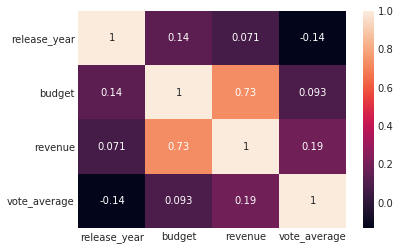

In [138]:
sns.heatmap(df[['release_year','budget','revenue', 'vote_average']].corr(),annot=True);

<a id='conclusions'></a>
## Conclusions

> This Dataset seemed from the beginning to have an excess of variables that were not useful for my investigation. Even if information such as calculation of the inflation on budget and revenue seems to be a good detail to consider, as I moved forward with my analysis I identified other needs in data organization and input that would facilitate the manipulation of the information for purposes of improving the Database for the movie industry. It seems that the focus of Data gathering is the audience.

> The biggest challenge of the investigation was to have to deal with different types of data, that I wanted to relate to making conclusions over the majority of the Dataset. This variety of data types made it hard for me to find coding that would give me a panorama. Therefore, there are few limitations to this analysis, such as the calculation of the impact of the inflation in the ranking, and proportion of importance of the user engagement over time. The way I have optioned to code my observations, these factors could have influenced the visualization of more details. On the other hand, through the histograms and data sorting, I didn't identify these aspects as important as they seemed they would represent in the beginning, so I decided to focus on my primary goal of the investigation.

> In my observation, there is a clear correlation between the categorical and numerical data we focused on, describing relationships between the user engagement and the financial performance of the movies. Even if it might seem obvious that if a movie was successful in budget and revenue, it would be in votes, to understand the causation of this matter was my inquiry.  A type of inquiry a production company would have when deciding on a next project to invest on. From this angle, it seems that the top recurrent successful production companies don't succeed alone, but with others. Which indicates that knowing more about the role of each production company could help even successful production companies to understand better the type of productive partnership between producers that is potentially successful. This type of answer could come from this Database if the information was gathered. 
Even the top production companies that appear among the top 100 best performances repeatedly might succeed when in partnership with some specific type of production company, for example creative, or even technical. If there is no pattern in the Database to inform that, it seems that probably these most successful production companies might also not have a clear understanding of which partners they should choose, and for which type of genres or budgets. Identifying this would increase the value of the entire IMDB Database. The effort would equal the separation of the columns "cast" and "director" for example. In the movie industry, some actors and directors seem to represent a success factor for movie production. But if many production companies are partnering, to specify their roles would then provide the same type of awareness. This understanding could benefit the entire industry, creating more opportunities for smaller production companies that partner with the most successful ones, stimulating more market partnerships. So, start ranking the financial performance in parallel with the user engagement and other factors such as the production companies and genres, would provide a much better sense of the movie industry as a whole. This could empower production companies that have participated in successful movies to become more known by the audience and by other producers. Perhaps giving them the same amount of reputation directors and cast have today for the Database users. Contributing to the overall industrial economy. 

> Finally, I wanted to explore the factors that may have influenced budget fundraising for specific film genres throughout time, to see if there were predictors of success of financial performance and user engagement. And it seems that the genres Action and Adventure are recurrent factors. On the other hand, these genres also appear with low ratings. So, not only the movie genres but also the production companies involved seem to correlate as a success factor for financial performance and user engagement. Eventually, cast and director too. Again, taking better advantage of the use of the variables of budget and revenue in association with the producers involved, could answer if the success factors are related eventually to specific types of creative or technical producers. The TMDB could empower this industry department.

> As a conclusion of this investigation, I would say that one very important variable is not present in the Database and could improve greatly its value is to include the Distribution companies among the Data entry. This Database seems interested in providing information to stimulate the user ratings, but the success factors involved seem to point to the aspects of movie production and distribution. For example, we could wonder "why the leading production companies succeed better in certain partnerships than others?" or "why popular genres don't succeed when produced by certain other production companies?" Distribution, which is not mentioned at all on the Database seems to have an economic impact on the movie industry today. An example is the rise of the company Netflix.

> Even if it seems that the users might be interested in searching for variables such as "director" or "cast", a movie Database that gathers information such as "budget" and "revenue" should include and organize with more detail, other variables that are useful for the industry. Standardizing the organization of movie genres would be a recommendation, same as including new variables.

> To correlate numerical and categorical data must ultimately answer questions that are more complex than "what?" or "who?", such as "how?" or "why?". Movies represent a great opportunity to build this ability, as they become successful for objective and subjective reasons.

> In order for the TMDB to provide this extra value, very simple changes could be implemented, allowing a sophistication of its database that stimulates a diversification of its users among the industry members. Even the movie audience today, might want to find new interests in using the database to learn more about producers and distributors of movies that are not on top, but part of the most successful movies of all times.

## References 

> As this project represented my first Data Analysis complete coding, I used many references to support me such as: https://docs.python.org/3/tutorial/, https://docs.python.org/3/reference/index.html, https://docs.python.org/3/library/, https://docs.python.org/3/howto/index.html, http://ipython.readthedocs.io/en/stable/interactive/magics.html, https://docs.scipy.org/doc/numpy/user/quickstart.html, https://matplotlib.org/api/pyplot_summary.html, http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html, https://pandas.pydata.org/pandas-docs/version/0.23.0/whatsnew.html#merging-on-a-combination-of-columns-and-index-levels, and https://pypi.org/project/ranking/.
https://seaborn.pydata.org and https://elitedatascience.com/python-seaborn-tutorial#step-2.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])